In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from visualization import nearby

In [2]:
abbr = "H74"
filename = u.get_filename(abbr)
basename = u.get_basename(filename)
combined_df = u.get_combinedf(basename)

In [3]:
vx_topic = "/imu_and_wheel_odom/lin_twi/x"
wz_topic = "/MTI_imu/data/ang_vel/z"
ld_topic = "/status/current/drive_left"
rd_topic = "/status/current/drive_right"
vx_cmd = "/husky_velocity_controller/cmd_vel_unstamped/linear/x"
wz_cmd = "/husky_velocity_controller/cmd_vel_unstamped/angular/z"

lincmd_topic = "/husky_velocity_controller/cmd_vel_unstamped/linear/x"
rotcmd_topic = "/husky_velocity_controller/cmd_vel_unstamped/angular/z"
lin_cmd = combined_df[lincmd_topic].copy()
rot_cmd = combined_df[rotcmd_topic].copy()
is_cmd = lin_cmd.notna() | rot_cmd.notna()
is_cmd_idx = is_cmd[is_cmd].index
print(f"{abbr} - {basename} - min: {is_cmd_idx.min()} - max: {is_cmd_idx.max()}")



H74 - H74_2023_12_18-14_08_09-MG-GrandAxeMultiTerrain - min: 268 - max: 6622


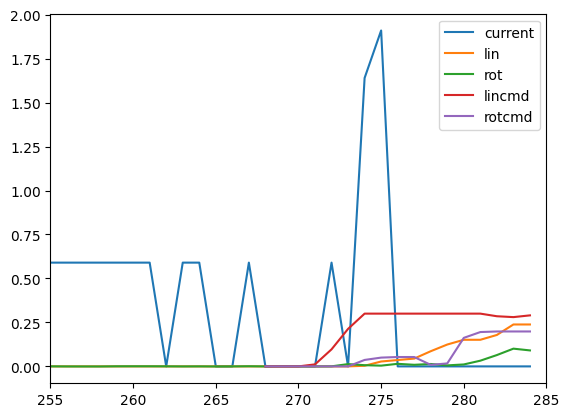

In [20]:
st = 270
nearby(combined_df, st, span=15)
nearby(combined_df, st, span=15, topic=vx_topic, label="lin")
nearby(combined_df, st, span=15, topic=wz_topic, label="rot")
nearby(combined_df, st, span=15, topic=vx_cmd, label="lincmd")
nearby(combined_df, st, span=15, topic=wz_cmd, label="rotcmd")
# nearby(combined_df, st, span=25, topic=wz_topic)
# nearby(combined_df, en, span=5, topic=wz_topic)
# nearby(combined_df, en, span=5, topic="/warthog_velocity_controller/cmd_vel/linear/x")
plt.gca().legend()

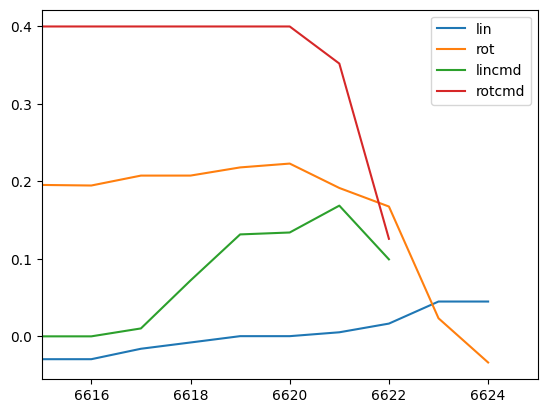

In [23]:
en = 6620
# nearby(combined_df, en, span=25)
nearby(combined_df, en, span=5, topic=vx_topic, label="lin")
nearby(combined_df, en, span=5, topic=wz_topic, label="rot")
nearby(combined_df, en, span=5, topic=vx_cmd, label="lincmd")
nearby(combined_df, en, span=5, topic=wz_cmd, label="rotcmd")
# nearby(combined_df, en, span=5, topic=rd_topic, label="right")
plt.gca().legend()

<Axes: >

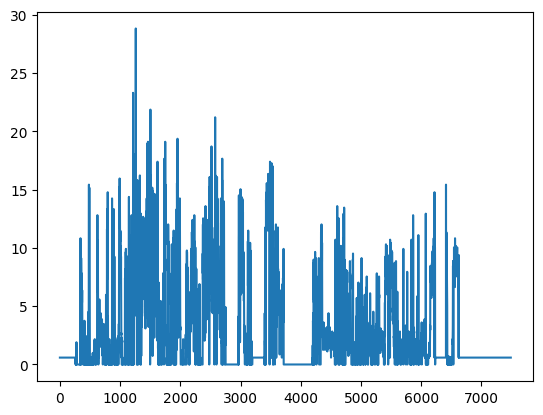

In [6]:
combined_df["current"].plot()
# combined_df[vx_topic].plot()

In [18]:
combined_df.head()
# cols = [col for col in combined_df.columns.values if col.startswith("/imu_and_wheel")]
# df = combined_df[cols].copy()
# clip = lambda s: s[20:]
# df.rename(clip, axis="columns", inplace=True)
# df.head()

time  /status/time  /status/voltage/drive_left  \
0  1.702926e+09           0.0                        6.46   
1  1.702926e+09           0.0                        6.46   
2  1.702926e+09           0.0                        6.46   
3  1.702926e+09           0.0                        6.46   
4  1.702926e+09           0.0                        6.46   

   /status/voltage/drive_right  /status/voltage/battery  /status/current/cpu  \
0                          6.5                    23.27                 0.22   
1                          6.5                    23.30                 0.20   
2                          6.5                    23.30                 0.30   
3                          6.5                    23.23                 0.16   
4                          6.5                    23.36                 0.44   

   /status/current/drive_left  /status/current/drive_right  \
0                        0.59                         0.59   
1                        0.59                         0.59   
2                        0.59                         0.59   
3                        0.59                         0.59   
4                        0.59                         0.59   

   /status/temperature/motor_left  /status/temperature/motor_right  ...  \
0                            22.0                            21.25  ...   
1                            22.0                            21.25  ...   
2                            22.0                            21.25  ...   
3                            22.0                            21.25  ...   
4                            22.0                            21.25  ...   

   /husky_velocity_controller/cmd_vel_unstamped/linear/z  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   /husky_velocity_controller/cmd_vel_unstamped/angular/x  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   /husky_velocity_controller/cmd_vel_unstamped/angular/y  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   /husky_velocity_controller/cmd_vel_unstamped/angular/z  current  voltage  \
0                                                NaN          0.59     6.46   
1                                                NaN          0.59     6.46   
2                                                NaN          0.59     6.46   
3                                                NaN          0.59     6.46   
4                                                NaN          0.59     6.46   

    power  time_rel  energy_ws  energy_wh  
0  3.8114  0.000000   0.000000   0.000000  
1  3.8114  0.176421   0.672410   0.000187  
2  3.8114  0.352039   1.341760   0.000373  
3  3.8114  0.528041   2.012576   0.000559  
4  3.8114  0.704094   2.683584   0.000745  

[5 rows x 67 columns]

In [8]:
combined_df.columns.values

array(['time', '/status/time', '/status/voltage/drive_left',
       '/status/voltage/drive_right', '/status/voltage/battery',
       '/status/current/cpu', '/status/current/drive_left',
       '/status/current/drive_right', '/status/temperature/motor_left',
       '/status/temperature/motor_right',
       '/status/temperature/drive_left',
       '/status/temperature/drive_right', '/status/battery/level',
       '/status/battery/total', 'time_floor', 'joint_states_time',
       '/joint_states/time', '/joint_states/velocity/left',
       '/joint_states/velocity/right', '/joint_states/position/left',
       '/joint_states/position/right', 'imu_data_time',
       '/MTI_imu/data/time', '/MTI_imu/data/orientation/x',
       '/MTI_imu/data/orientation/y', '/MTI_imu/data/orientation/z',
       '/MTI_imu/data/orientation/w', '/MTI_imu/data/orientation/roll',
       '/MTI_imu/data/orientation/pitch', '/MTI_imu/data/orientation/yaw',
       '/MTI_imu/data/ang_vel/x', '/MTI_imu/data/ang_vel/y',
  

In [9]:
[col for col in combined_df.columns.values if "cmd" in col]
# combined_df["/cmd_vel/linear/x"].plot()

['cmd_vel_time',
 '/husky_velocity_controller/cmd_vel_unstamped/linear/x',
 '/husky_velocity_controller/cmd_vel_unstamped/linear/y',
 '/husky_velocity_controller/cmd_vel_unstamped/linear/z',
 '/husky_velocity_controller/cmd_vel_unstamped/angular/x',
 '/husky_velocity_controller/cmd_vel_unstamped/angular/y',
 '/husky_velocity_controller/cmd_vel_unstamped/angular/z']

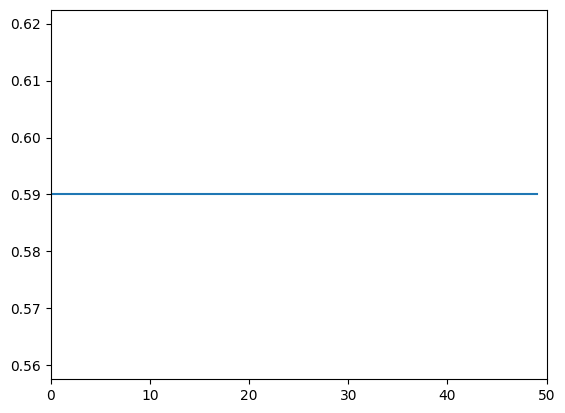

In [10]:
nearby(combined_df, 25, span=25)

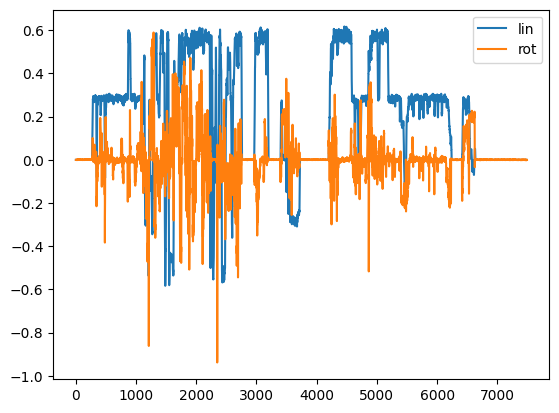

In [11]:
fig, ax = plt.subplots()
# combined_df.current.plot(ax=ax, label="current")
combined_df[vx_topic].plot(ax=ax, label="lin")
combined_df[wz_topic].plot(ax=ax, label="rot")
ax.legend()

<Axes: >

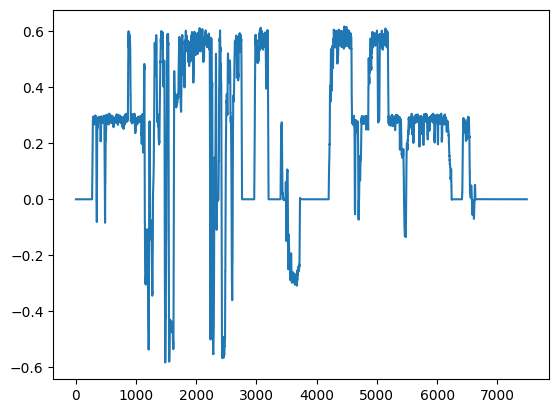

In [12]:
combined_df[vx_topic].plot()

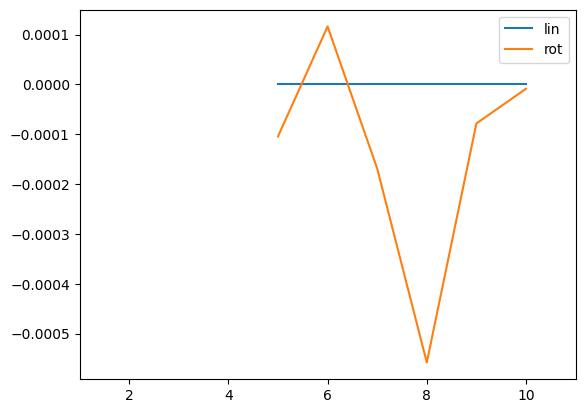

In [13]:
fig, ax = plt.subplots()
li = st
# li = en
nearby(combined_df, li, topic=vx_topic, span=5, ax=ax, label="lin")
nearby(combined_df, li, topic=wz_topic, span=5, ax=ax, label="rot")
ax.legend()
# nearby(combined_df, en, topic=vx_topic, span=5)
# nearby(combined_df, st, topic="front_altitude", span=50)
# nearby(combined_df, en, topic="front_altitude", span=50)

<Axes: >

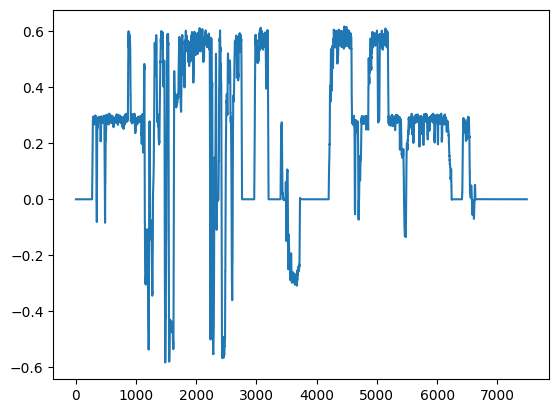

In [14]:
# combined_df["/cmd_vel/linear/x"].plot()
combined_df["/imu_and_wheel_odom/lin_twi/x"].plot()

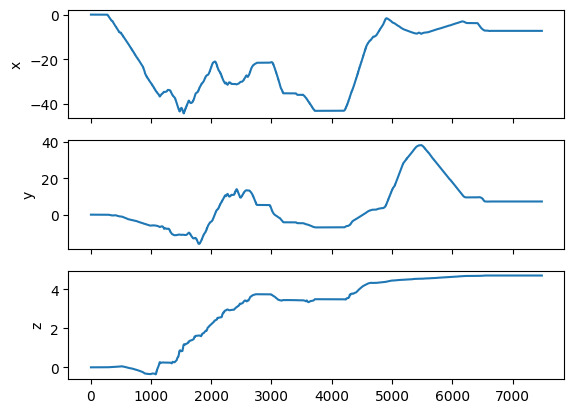

In [15]:
fig, subfigs = plt.subplots(nrows=3, sharex=True)
for letter, ax in zip("xyz",subfigs.reshape(-1)):
    combined_df[f"/imu_and_wheel_odom/position/{letter}"].plot(ax=ax)
    ax.set_ylabel(letter)

Text(0.5, 0, 'Duration [s]')

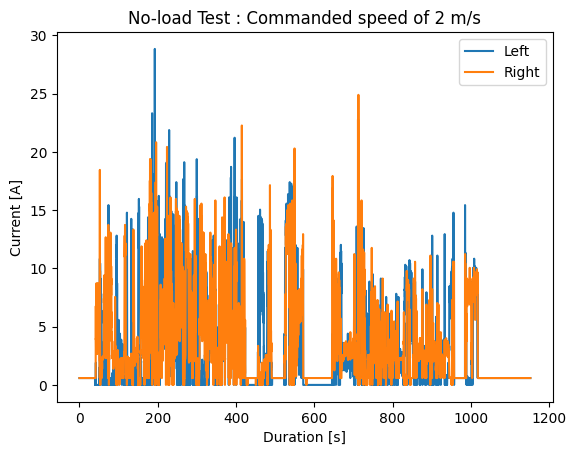

In [16]:
fig, ax = plt.subplots()
ax.plot(combined_df.time_rel, combined_df[ld_topic], label="Left")
ax.plot(combined_df.time_rel, combined_df[rd_topic], label="Right")
ax.legend()
ax.set_title("No-load Test : Commanded speed of 2 m/s")
ax.set_ylabel("Current [A]")
ax.set_xlabel("Duration [s]")